<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_SimpleRNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [12]:
# Additional imports

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

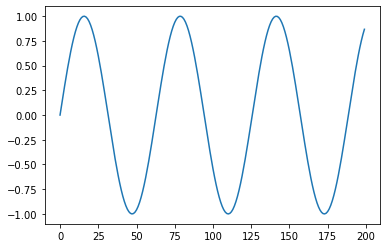

In [13]:
# Make the original data

series = np.sin(0.1*np.arange(200)) # + np.random.randn(200)*0.1

# Plot it
plt.plot(series)
plt.show()

In [14]:
# Build the datasets
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape ", X.shape, "Y.shape ", Y.shape)

X.shape  (190, 10, 1) Y.shape  (190,)


In [15]:
# Autoregressive RNN model

i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 111ms/step - loss: 6.4364 - val_loss: 0.2515
Epoch 2/80
3/3 [==============================] - 0s 20ms/step - loss: 0.4263 - val_loss: 0.5213
Epoch 3/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6268 - val_loss: 1.2425
Epoch 4/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6936 - val_loss: 1.5833
Epoch 5/80
3/3 [==============================] - 0s 21ms/step - loss: 1.0072 - val_loss: 0.6369
Epoch 6/80
3/3 [==============================] - 0s 20ms/step - loss: 0.6029 - val_loss: 0.4368
Epoch 7/80
3/3 [==============================] - 0s 22ms/step - loss: 0.4686 - val_loss: 0.3842
Epoch 8/80
3/3 [==============================] - 0s 20ms/step - loss: 0.3764 - val_loss: 0.3427
Epoch 9/80
3/3 [==============================] - 0s 20ms/step - loss: 0.3359 - val_loss: 0.3361
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3154 - val_loss: 0.2863
Epoch 11/80
3/3 [===========

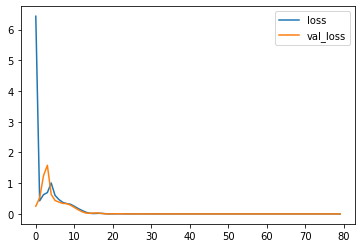

In [16]:
# Plot loss per ieration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [17]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# Index of list validation input
i = N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1

  # Update the predictions list
  validation_predictions.append(p)

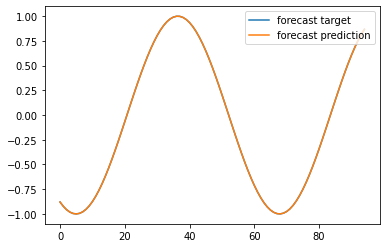

In [18]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [19]:
# Forecast future values 

validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2] # 1xD array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

  # Update the prediction list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

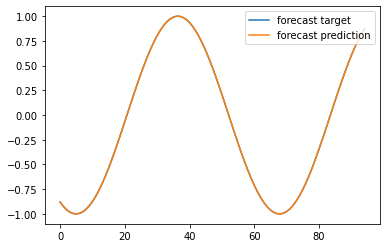

In [20]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()